In [1]:
library(ggplot2)
library(cowplot)

library(dplyr)

library(readxl)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# df <- read_excel("Tomate.xlsx")
df <- read.csv("df.csv")[,-1]

colnames(df) <- c("estacao", "tratamento", "bloco", "colheita", "peso", "n_frutos", "comprimento", "largura", "pca")

head(df, 3)

,estacao,tratamento,bloco,colheita,peso,n_frutos,comprimento,largura,pca
,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,P-V,1,1,1,309,1.5,62.33333,82.33333,0.6485933
2,P-V,1,2,1,0,0.0,0.00000,0.00000,5.2014820
3,P-V,1,3,1,196,1.0,63.00000,71.00000,1.0720750


In [3]:
head(df,3)

,estacao,tratamento,bloco,colheita,peso,n_frutos,comprimento,largura,pca
,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,P-V,1,1,1,309,1.5,62.33333,82.33333,0.6485933
2,P-V,1,2,1,0,0.0,0.00000,0.00000,5.2014820
3,P-V,1,3,1,196,1.0,63.00000,71.00000,1.0720750


In [4]:
df$estacao <- as.factor(df$estacao)
df$bloco <- as.factor(df$bloco)
df$colheita <- as.factor(df$colheita)
df$tratamento <- as.factor(df$tratamento)

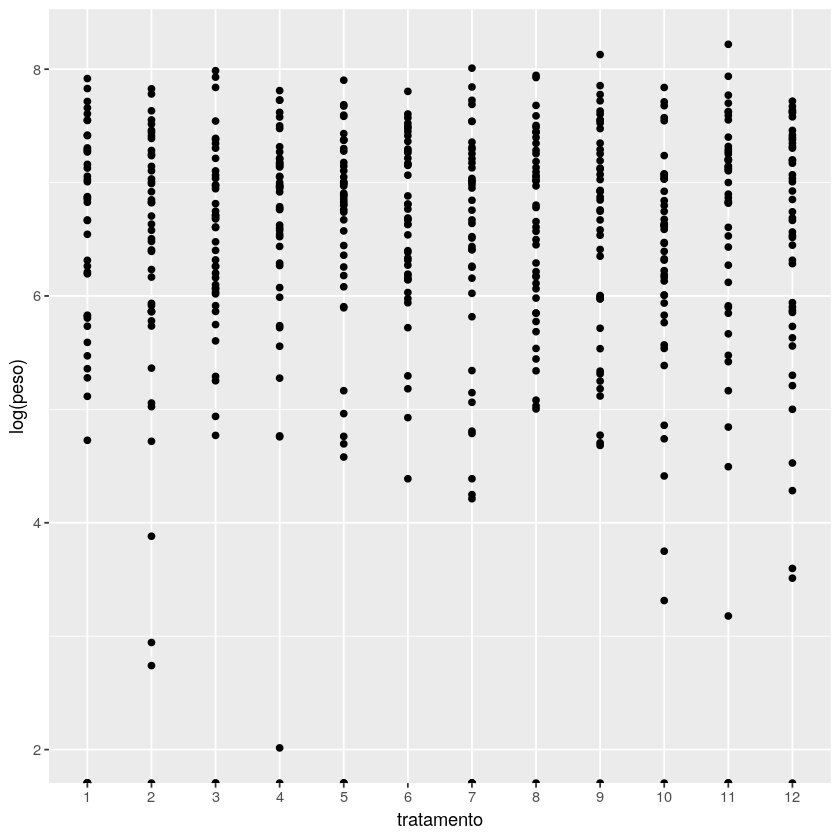

In [8]:
ggplot(df)+
    geom_point(aes(x = tratamento, y = log(peso)))

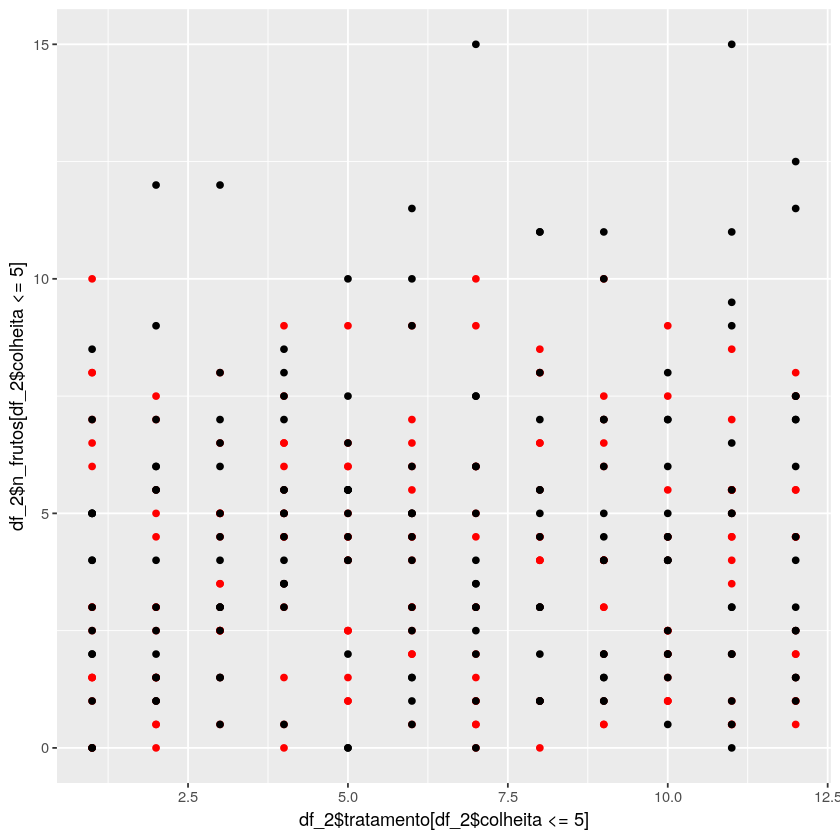

In [73]:
df_2 <- df %>% filter(estacao == "P-V")

g1 <- ggplot()+
    geom_point(aes(x = df_2$tratamento[df_2$colheita <= 5], y = df_2$n_frutos[df_2$colheita <= 5]), color = "red")+
    geom_point(aes(x = df_2$tratamento[df_2$colheita > 5], y = df_2$n_frutos[df_2$colheita > 5]), color = "black")
g1

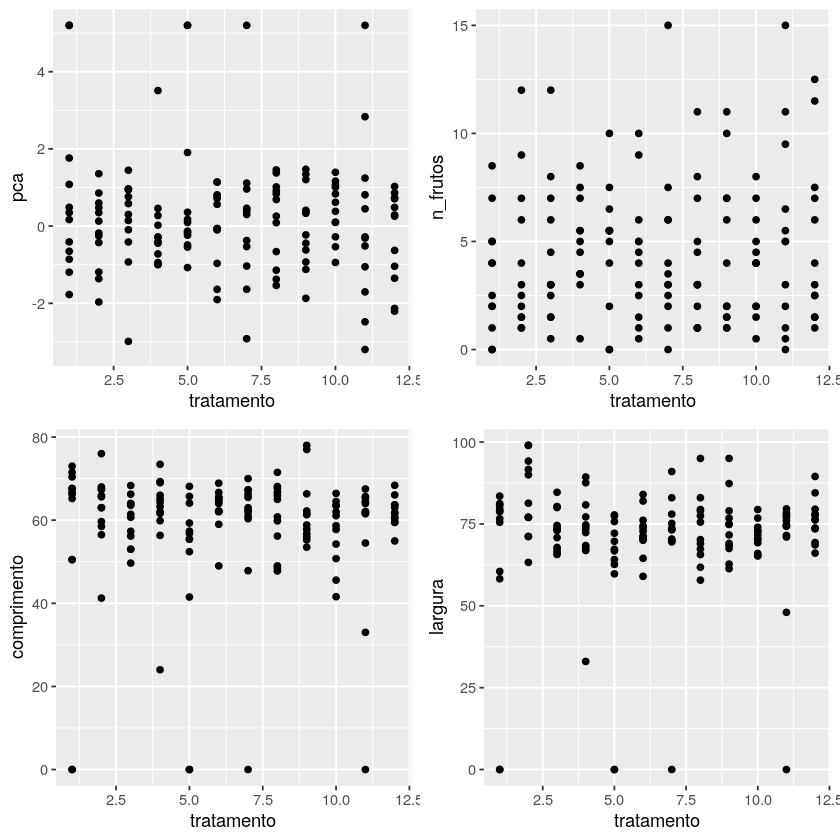

In [65]:
df_2 <- df %>% filter(colheita >= 7 & estacao == "P-V")

g1 <- ggplot(df_2)+
    geom_point(aes(x = tratamento, y = pca))
g2 <- ggplot(df_2)+
    geom_point(aes(x = tratamento, y = n_frutos))
g3 <- ggplot(df_2)+
    geom_point(aes(x = tratamento, y = comprimento))
g4 <- ggplot(df_2)+
    geom_point(aes(x = tratamento, y = largura))
               
plot_grid(g1, g2, g3, g4, nrow = 2)

In [45]:
head(df,1)

estacao,tratamento,bloco,colheita,peso,n_frutos,comprimento,largura
<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
P-V,1,1,1,309,1.5,62.33333,82.33333


In [76]:
fit <- lm(n_frutos ~ tratamento, data = df)

summary(fit)


Call:
lm(formula = n_frutos ~ tratamento, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3222 -2.2667 -0.3444  1.5667 11.2889 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.5889     0.4216   8.513   <2e-16 ***
tratamento2    0.1444     0.5962   0.242    0.809    
tratamento3    0.2556     0.5962   0.429    0.668    
tratamento4    0.4667     0.5962   0.783    0.434    
tratamento5    0.3444     0.5962   0.578    0.564    
tratamento6    0.5667     0.5962   0.950    0.342    
tratamento7    0.1222     0.5962   0.205    0.838    
tratamento8    0.6778     0.5962   1.137    0.256    
tratamento9    0.5556     0.5962   0.932    0.352    
tratamento10  -0.1111     0.5962  -0.186    0.852    
tratamento11   0.7333     0.5962   1.230    0.219    
tratamento12   0.4889     0.5962   0.820    0.413    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.828 on 528 degrees of freedom
Multiple R